In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
import warnings

warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated", category=FutureWarning)


In [400]:
train_set = pd.read_csv('Datasets/train.csv')

train_set.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


### data cleaning

In [401]:
# get copy

train_set_cleaned = train_set.copy()

In [402]:
# add two new attributes, split rent_approval_date into month, year

train_set_cleaned[['rent_approval_year','rent_approval_month']] = train_set_cleaned['rent_approval_date'].str.split('-',expand=True)

# train_set_cleaned['rent_approval_month'] = pd.to_datetime(train_set_cleaned['rent_approval_month'], format='%m').dt.month
# train_set_cleaned['rent_approval_year'] = pd.to_datetime(train_set_cleaned['rent_approval_year'], format='%y').dt.year

In [403]:
# street name to lower case

train_set_cleaned['street_name'] = train_set_cleaned['street_name'].apply(str.lower)

In [404]:
# replace blank space with hyphen in flat_type (e.g. '2 room' to '2-room')

train_set_cleaned['flat_type'] = train_set_cleaned['flat_type'].apply(lambda x: x.replace(' ', '-'))

In [405]:
train_set_cleaned.head(10)

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,rent_approval_year,rent_approval_month
0,2021-09,jurong east,257,jurong east street 24,3-room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,09
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,05
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,10
3,2021-08,pasir ris,250,pasir ris street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,08
4,2022-11,kallang/whampoa,34,whampoa west,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,11
5,2023-04,bukit panjang,654,senja road,executive,premium apartment,130.0,yes,2001,1.387847,103.764249,0.0,saujana,bukit panjang,west region,2300,2023,04
6,2021-01,sengkang,407b,fernvale road,5-room,premium apartment,110.0,yes,2005,1.388997,103.875148,0.0,fernvale,sengkang,north-east region,2100,2021,01
7,2022-06,ang mo kio,223,ang mo kio avenue 1,3-room,new generation,67.0,yes,1978,1.366048,103.838123,0.0,shangri-la,ang mo kio,north-east region,2300,2022,06
8,2021-10,bishan,149,bishan street 11,4-room,simplified,84.0,yes,1987,1.344279,103.855556,0.0,bishan east,bishan,central region,2100,2021,10
9,2021-04,punggol,133,edgedale plains,5-room,premium apartment,112.0,yes,2003,1.392832,103.910620,0.0,punggol field,punggol,north-east region,2100,2021,04


In [406]:
train_set_cleaned['rent_approval_year'].value_counts()

rent_approval_year
2021    24909
2022    21399
2023    13692
Name: count, dtype: int64

### auxiliary data

### encoding

In [407]:
# create a new dataframe
encoded_train_set = train_set_cleaned[['monthly_rent']].copy()

#### spatial information

In [408]:
## encode block (with street name) with target variable information

block_encoder = TargetEncoder()
encoded_train_set['block_encoded'] = block_encoder.fit_transform(train_set_cleaned['street_name']+train_set_cleaned['block'], train_set_cleaned['monthly_rent'])

block_date_encoder = TargetEncoder()
encoded_train_set['block_date_encoded'] = block_date_encoder.fit_transform(train_set_cleaned['block'] + train_set_cleaned['rent_approval_date'], train_set_cleaned['monthly_rent'])

#### rent date & lease date

In [409]:
# rental approval date

rental_encoder = TargetEncoder()
encoded_train_set['rental_approval_date_encoded'] = rental_encoder.fit_transform(train_set_cleaned['rent_approval_date'].astype(str), train_set_cleaned['monthly_rent'])

rental_date_rent_corr = encoded_train_set['rental_approval_date_encoded'].corr(encoded_train_set['monthly_rent'])
print(f'Rental Approval Date and Monthly Rental correlation is {rental_date_rent_corr:3f}')

Rental Approval Date and Monthly Rental correlation is 0.546074


In [410]:
# lease commence year (in decade)

lease_encoder = TargetEncoder()
encoded_train_set['lease_commence_date_encoded'] = lease_encoder.fit_transform(train_set_cleaned['lease_commence_date'], train_set_cleaned['monthly_rent'])

# type_by_lease_date = TargetEncoder()
# encoded_train_set['type_by_lease_date'] = type_by_lease_date.fit_transform(train_set_cleaned['lease_date_cat']+train_set_cleaned['flat_type'], train_set_cleaned['monthly_rent'])

In [411]:
# rental date + type (NOT good for GBR)

type_by_date = TargetEncoder()
encoded_train_set['type_by_date_encoded'] = type_by_date.fit_transform(train_set_cleaned['rent_approval_date']+train_set_cleaned['flat_type'], train_set_cleaned['monthly_rent'])

type_by_date_rent_corr = encoded_train_set['type_by_date_encoded'].corr(encoded_train_set['monthly_rent'])
print(f'Flat Type by Rental Date and Monthly Rental correlation is {type_by_date_rent_corr:3f}')

Flat Type by Rental Date and Monthly Rental correlation is 0.655330


#### flat_type and flat_model

In [412]:
train_set_cleaned['flat_type'].value_counts()

flat_type
4-room       21889
3-room       18897
5-room       14759
executive     3528
2-room         927
Name: count, dtype: int64

In [413]:
# flat type

encoded_train_set_copy = encoded_train_set.copy()
encoded_train_set_copy['flat_type'] = train_set_cleaned['flat_type']
encoded_train_set = pd.get_dummies(encoded_train_set_copy, columns=['flat_type'])


In [414]:
# flat model

flat_model_encoder = TargetEncoder()
encoded_train_set['flat_model_encoded'] = flat_model_encoder.fit_transform(train_set_cleaned['flat_model'], train_set_cleaned['monthly_rent'])

flat_model_rent_corr = encoded_train_set['flat_model_encoded'].corr(encoded_train_set['monthly_rent'])
print(f'Flat Model and Monthly Rental correlation is {flat_model_rent_corr:3f}')

# encoded_train_set_copy = encoded_train_set.copy()
# encoded_train_set_copy['flat_model'] = train_set_cleaned['flat_model']
# encoded_train_set = pd.get_dummies(encoded_train_set_copy, columns=['flat_model'])

Flat Model and Monthly Rental correlation is 0.236876


In [415]:
# ## street + type

type_by_subzone = TargetEncoder()
encoded_train_set['type_by_subzone_encoded'] = type_by_subzone.fit_transform(train_set_cleaned['subzone']+train_set_cleaned['flat_type'], train_set_cleaned['monthly_rent'])

#### floor area

In [416]:
# floor area sqm

# round to the nearest 10s
# train_set_cleaned['floor_area_sqm'] = train_set_cleaned['floor_area_sqm'].round(-1).astype(int)

encoded_train_set['floor_area_sqm'] = train_set_cleaned['floor_area_sqm'].copy()

floor_area_sqm_corr = encoded_train_set['floor_area_sqm'].corr(encoded_train_set['monthly_rent'])
print(f'Floor Area in Sqm and Monthly Rental correlation is {floor_area_sqm_corr:3f}')

Floor Area in Sqm and Monthly Rental correlation is 0.306466


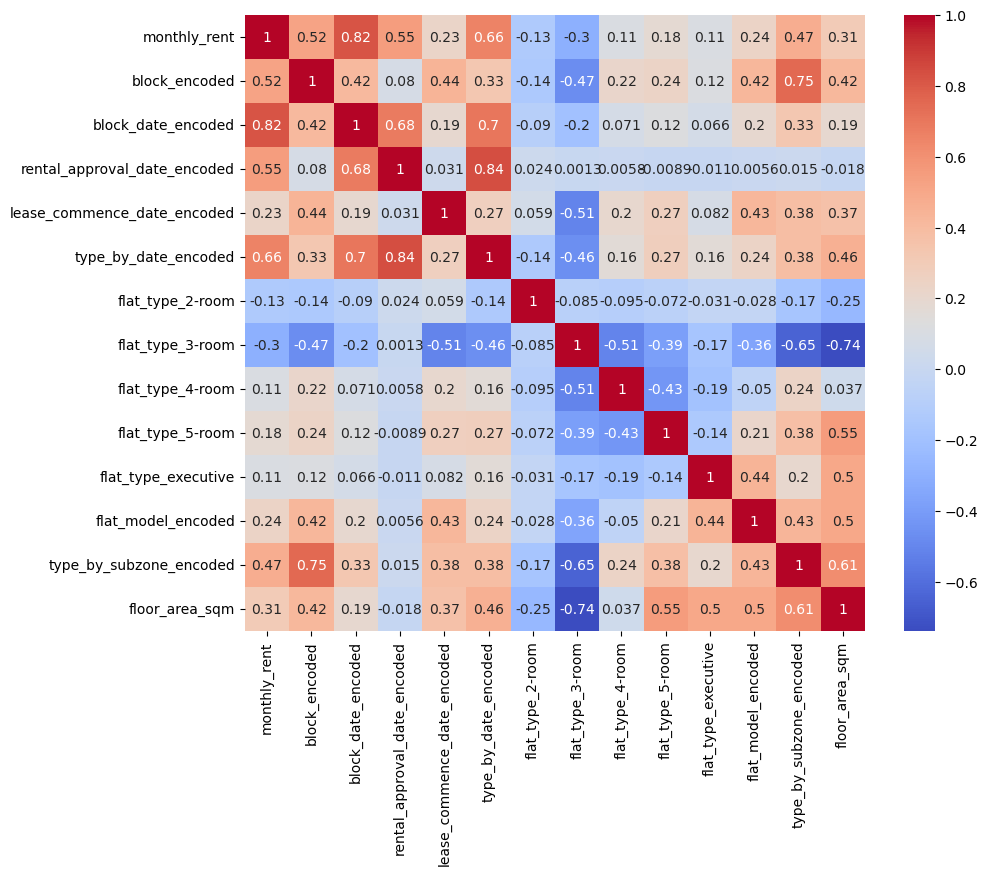

In [417]:
corr = encoded_train_set.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### normalization

In [418]:
from sklearn.preprocessing import StandardScaler

In [419]:
encoded_train_set
encoded_train_set.columns

Index(['monthly_rent', 'block_encoded', 'block_date_encoded',
       'rental_approval_date_encoded', 'lease_commence_date_encoded',
       'type_by_date_encoded', 'flat_type_2-room', 'flat_type_3-room',
       'flat_type_4-room', 'flat_type_5-room', 'flat_type_executive',
       'flat_model_encoded', 'type_by_subzone_encoded', 'floor_area_sqm'],
      dtype='object')

In [420]:
# initialize the feature scaler
scaler = StandardScaler()

normalized_features = scaler.fit_transform(encoded_train_set.iloc[:,1:])

In [421]:
df_describe = pd.DataFrame(normalized_features)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,2.274684e-15,-5.610327e-15,-1.717737e-16,3.295971e-15,6.059745e-16,1.379637e-17,-1.297925e-16,4.523789e-17,-3.215206e-17,2.984279e-17,-1.326346e-17,3.119283e-16,9.616012e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-4.021880e+00,-3.281799e+00,-1.136227e+00,-2.048899e+00,-1.887184e+00,-1.252695e-01,-6.780468e-01,-7.578579e-01,-5.711660e-01,-2.499469e-01,-3.995729e+00,-3.128820e+00,-2.511392e+00
25%,-5.535625e-01,-7.328763e-01,-8.720157e-01,-8.134499e-01,-6.784907e-01,-1.252695e-01,-6.780468e-01,-7.578579e-01,-5.711660e-01,-2.499469e-01,-7.507854e-01,-7.186945e-01,-8.919552e-01
50%,-5.096325e-02,-2.389601e-01,-3.898313e-01,-2.369070e-01,-2.476472e-01,-1.252695e-01,-6.780468e-01,-7.578579e-01,-5.711660e-01,-2.499469e-01,1.323593e-01,-2.165164e-02,-6.147460e-02
75%,4.530094e-01,6.203927e-01,1.227626e+00,7.514523e-01,6.145215e-01,-1.252695e-01,1.474824e+00,1.319509e+00,-5.711660e-01,-2.499469e-01,2.772886e-01,5.285742e-01,6.444339e-01
max,9.372359e+00,6.307832e+00,1.721150e+00,2.316355e+00,2.589183e+00,7.982789e+00,1.474824e+00,1.319509e+00,1.750804e+00,4.000850e+00,1.030540e+01,5.340409e+00,5.004457e+00


In [422]:
# normalize target variable
y_scaler = StandardScaler()

target_variable = y_scaler.fit_transform(encoded_train_set['monthly_rent'].to_numpy().reshape(-1, 1))
target_variable = target_variable.reshape(-1)

In [423]:
df_describe = pd.DataFrame(target_variable)
df_describe.describe()

,0
count,6.000000e+04
mean,-5.826450e-17
std,1.000008e+00
min,-3.203684e+00
25%,-6.858655e-01
50%,-2.662290e-01
75%,5.730439e-01
max,6.098257e+00


#### Feature Importance

In [424]:
from sklearn.linear_model import Lasso

In [425]:
lasso=Lasso(alpha=0.001)
lasso.fit(normalized_features, target_variable)

Lasso(alpha=0.001)

In [426]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=encoded_train_set.iloc[:,1:].columns)

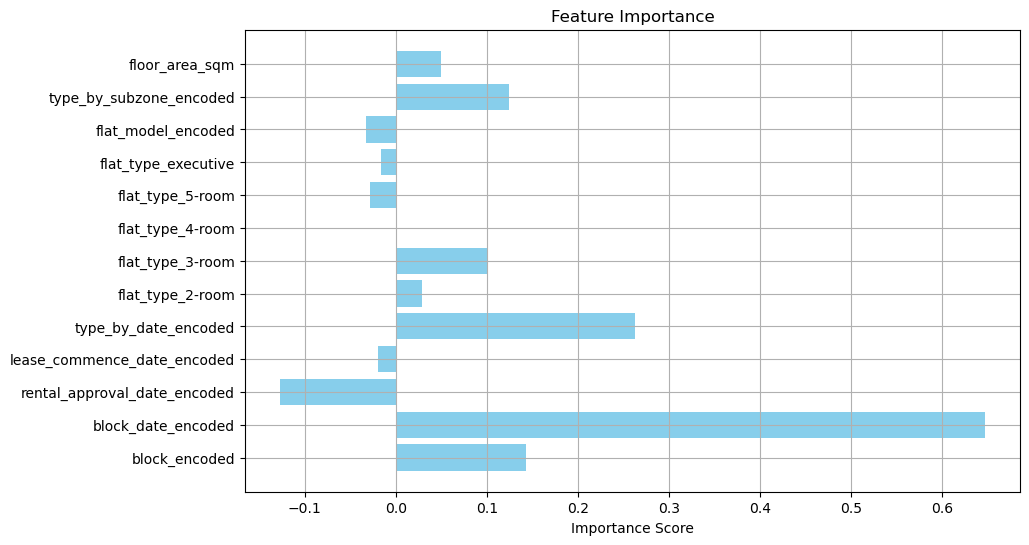

In [427]:
plt.figure(figsize=(10, 6))
plt.barh(FI_lasso.index, FI_lasso['Feature Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

### training

In [428]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [446]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(normalized_features, target_variable, test_size=0.2, random_state=42)

#### lasso regression model

In [447]:
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Lasso Regression with cross-validation
lasso = LassoCV(cv=kfold, random_state=42)
lasso.fit(X_train, y_train)

LassoCV(cv=KFold(n_splits=5, random_state=24, shuffle=True), random_state=42)

In [448]:
# evaluate the model

print("Optimal alpha:", lasso.alpha_)
print("Mean cross-validated score of the best estimator:", lasso.score(X_test, y_test))

Optimal alpha: 0.000819693377336223
Mean cross-validated score of the best estimator: 0.7260254336773782


In [449]:
# making predictions 
y_pred = lasso.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso Regression Mean Squared Error: {mse}")
print(f"Model Coefficients: \n{lasso.coef_}")

Lasso Regression Mean Squared Error: 0.2738043858407155
Model Coefficients: 
[ 0.14095657  0.647469   -0.13538314 -0.01733504  0.27245088  0.03405128
  0.11119601  0.         -0.03373325 -0.02597536 -0.02871078  0.13297528
  0.05591498]


### test set evaluation

In [433]:
test_set = pd.read_csv('Datasets/test.csv')

test_set.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region


In [434]:
(test_set.isna().sum(axis=1) > 0).sum()

0

In [435]:
# data preparation

test_set[['rent_approval_year','rent_approval_month']] = test_set['rent_approval_date'].str.split('-',expand=True)

# street name to lower case
test_set['street_name'] = test_set['street_name'].apply(str.lower)

# replace blank space with hyphen in flat_type (e.g. '2 room' to '2-room')
test_set['flat_type'] = test_set['flat_type'].apply(lambda x: x.replace(' ', '-'))

# # categorize lease commence date by decades (remember to date_filter_condition function above first)
# test_set['lease_date_cat'] = test_set['lease_commence_date'].apply(date_filter_condition)

In [436]:
# encoding test set

encoded_test_set = pd.DataFrame(index=test_set.index)

encoded_test_set['block_encoded'] = block_encoder.transform(test_set['street_name']+test_set['block'])
encoded_test_set['block_date_encoded'] = block_date_encoder.transform(train_set_cleaned['block'] + train_set_cleaned['rent_approval_date'])

encoded_test_set['rental_approval_date_encoded'] = rental_encoder.transform(test_set['rent_approval_date'])

encoded_test_set['lease_commence_date_encoded'] = lease_encoder.transform(test_set['lease_commence_date'])
encoded_test_set['type_by_date_encoded'] = type_by_date.transform(test_set['rent_approval_date']+test_set['flat_type'])

encoded_test_set_copy = encoded_test_set.copy()
encoded_test_set_copy['flat_type'] = test_set['flat_type']
encoded_test_set = pd.get_dummies(encoded_test_set_copy, columns=['flat_type'])

encoded_test_set['flat_model_encoded'] = flat_model_encoder.transform(test_set['flat_model'])
# encoded_test_set_copy2 = encoded_test_set.copy()
# encoded_test_set_copy2['flat_model'] = test_set['flat_model']
# encoded_test_set = pd.get_dummies(encoded_test_set_copy2, columns=['flat_model'], prefix='flat_model')

encoded_test_set['type_by_subzone_encoded'] = type_by_subzone.transform(test_set['subzone']+test_set['flat_type'])


encoded_test_set['floor_area_sqm'] = test_set['floor_area_sqm'].copy()
# if 'flat_model_3gen' not in encoded_test_set.columns:
#     encoded_test_set['flat_model_3gen'] = 0

encoded_test_set.columns
print(len(encoded_test_set.columns))

13


In [437]:
encoded_test_set.head(10)

,block_encoded,block_date_encoded,rental_approval_date_encoded,lease_commence_date_encoded,type_by_date_encoded,flat_type_2-room,flat_type_3-room,flat_type_4-room,flat_type_5-room,flat_type_executive,flat_model_encoded,type_by_subzone_encoded,floor_area_sqm
0,2556.237503,2440.769542,3069.581639,1984,3427.662037,False,False,False,True,False,2636.211052,2780.532415,121.0
1,2509.793159,2531.892269,2812.587413,1999,2924.288107,False,False,True,False,False,2612.031305,2515.486726,100.0
2,2626.547123,2584.795671,3262.248898,1980,3406.266491,False,False,True,False,False,2369.965462,2815.049618,91.0
3,2540.333848,2531.059660,2249.901768,1986,1988.479624,False,True,False,False,False,2612.031305,2169.687850,74.0
4,2542.787517,2518.784359,2449.322430,1983,2665.350877,False,False,False,True,False,2636.211052,2745.291569,121.0
5,2629.794822,2666.480481,2351.327643,1980,2085.797101,False,True,False,False,False,2369.965462,2215.660377,67.0
6,2620.454030,2526.532462,2216.537301,2005,2390.219224,False,False,False,True,False,2709.678998,2711.576353,110.0
7,2730.005494,2540.333848,2755.309735,2008,2985.820896,False,False,False,True,False,3150.404313,2891.894198,108.0
8,2649.937911,2540.333848,2339.852217,2001,2612.492565,False,False,False,False,True,2709.678998,3018.974348,133.0
9,2808.073641,2528.243759,3262.248898,1975,3611.022044,False,False,False,True,False,2444.223986,3405.933070,120.0


In [438]:
# normalization

normalized_test_features = scaler.transform(encoded_test_set)

In [439]:
# lasso regressor prediction
lasso_y_pred = lasso.predict(normalized_test_features).reshape(-1, 1)
lasso_y_pred = y_scaler.inverse_transform(lasso_y_pred)

In [440]:
lasso_y_pred[:20]

array([[2051.03832811],
       [2267.86174066],
       [2835.89939822],
       [2076.98748298],
       [2266.52769777],
       [2891.64566365],
       [2246.91827842],
       [2502.02017686],
       [2514.77671223],
       [2924.01800778],
       [2069.73812424],
       [2510.5004701 ],
       [2510.0142118 ],
       [2251.46370476],
       [2964.42343493],
       [2253.19100356],
       [3319.32352128],
       [4064.4965141 ],
       [2168.12017979],
       [2574.7863269 ]])

In [441]:
df = pd.DataFrame(lasso_y_pred, columns=['Predicted'])
df.to_csv("predictions/updated_lasso.csv", index_label="Id", header=True, float_format='%.4f')